<a href="https://colab.research.google.com/github/SeWonKwon/NLP/blob/main/L06_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups


dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                              remove=('headers', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
print(documents[0])

11314
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text = re.sub(pattern, '', d)
  return text

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 3])

def preprocessing(d):
  return preprocess_string(d)



In [ ]:
import pandas as pd
news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [ ]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
len(news_df)

11096

In [ ]:
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
# news_df['article'] = news_df['article'].apply(preprocessing)

In [ ]:
news_df['article']

0        well sure story seem biased disagree statement...
1        yeah expect people read actually accept hard a...
2        although realize principle strongest points wo...
3        notwithstanding legitimate fuss proposal much ...
4        well change scoring playoff pool unfortunately...
                               ...                        
11309    danny rubenstein israeli journalist speaking t...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet orange micros grappler system upd...
11313    argument murphy scared hell came last year han...
Name: article, Length: 11096, dtype: object

In [ ]:
len(news_df)

11096

In [ ]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
len(news_df)

10991

In [ ]:
tokenized_news = news_df['article'].apply(preprocessing)

tokenized_news = tokenized_news.to_list()
# tokenized_news

In [ ]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

10926


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Gensim을 이용한 토픽 모델링

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [ ]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + 0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + 0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '0.456*"file" + -0.215*"peopl" + -0.210*"know" + -0.192*"said" + -0.176*"dont" + 0.158*"entri" + -0.158*"think" + -0.153*"stephanopoulo" + 0.139*"imag" + -0.129*"go"'),
 (3,
  '0.409*"file" + 0.286*"entri" + -0.241*"imag" + -0.168*"avail" + -0.141*"wire" + -0.136*"data" + -0.122*"version" + 0.116*"onam" + -0.109*"window" + 0.104*"said"'),
 (4,
  '-0.618*"wire" + -0.250*"ground" + -0.188*"circu

In [ ]:
# 몇개의 모델로 나누느게 좋을까? 

from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25

coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)
  
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.40304703118582175, 0.42657991250749205, 0.40894119788186684, 0.4201269189257343, 0.39460616017765265]


Text(0, 0.5, 'Coherence_scores')

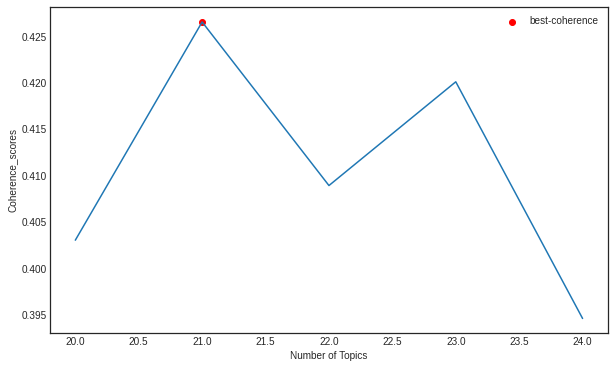

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

x = range(min_topics, max_topics)
best_num = x[coherence_scores.index(max(coherence_scores))]
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.scatter(x=best_num, y=max(coherence_scores),c='r', label='best-coherence')
plt.legend()
plt.xlabel('Number of Topics')
plt.ylabel('Coherence_scores')

In [ ]:
# 가장 높은 게 좋은거~
lsi_model = LsiModel(corpus, num_topics=best_num, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=best_num)
topics

[(0,
  '1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + 0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + 0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"'),
 (1,
  '0.393*"file" + 0.191*"program" + 0.158*"imag" + 0.126*"peopl" + 0.125*"avail" + 0.119*"inform" + 0.116*"includ" + 0.116*"entri" + 0.114*"work" + 0.112*"dont"'),
 (2,
  '-0.456*"file" + 0.215*"peopl" + 0.210*"know" + 0.192*"said" + 0.176*"dont" + -0.158*"entri" + 0.158*"think" + 0.153*"stephanopoulo" + -0.139*"imag" + 0.129*"go"'),
 (3,
  '0.409*"file" + 0.286*"entri" + -0.241*"imag" + -0.168*"avail" + -0.141*"wire" + -0.136*"data" + -0.122*"version" + 0.116*"onam" + -0.109*"window" + 0.104*"said"'),
 (4,
  '-0.618*"wire" + -0.250*"ground" + -0.188*"circuit" 

### 잠재 디리클레 할당을 위한 `LdaModel`

In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.010*"team" + 0.009*"game" + 0.007*"hockei" + 0.007*"plai" + 0.006*"year" + 0.005*"player" + 0.005*"like" + 0.005*"leagu" + 0.005*"time" + 0.005*"think"'),
 (1,
  '0.007*"wire" + 0.006*"ground" + 0.005*"control" + 0.005*"space" + 0.004*"time" + 0.004*"mile" + 0.003*"engin" + 0.003*"includ" + 0.003*"center" + 0.003*"electr"'),
 (2,
  '0.026*"card" + 0.014*"modem" + 0.007*"port" + 0.007*"driver" + 0.005*"calgari" + 0.005*"slot" + 0.005*"vesa" + 0.004*"video" + 0.004*"stealth" + 0.004*"vancouv"'),
 (3,
  '0.010*"govern" + 0.009*"state" + 0.008*"peopl" + 0.007*"public" + 0.006*"right" + 0.005*"health" + 0.004*"nation" + 0.004*"american" + 0.004*"secur" + 0.004*"unit"'),
 (4,
  '0.140*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.004*"jesu" + 0.003*"iniqu" + 0.002*"father" + 0.002*"baptism" + 0.002*"mormon" + 0.002*"christ" + 0.002*"ciphertext" + 0.002*"quantiti" + 0.002*"mari"'),
 (5,
  '0.005*"number" + 0.004*"time" + 0.004*"encrypt" + 0.004*"kei" + 0.004*"scienc" + 0.004*"gener" + 0.003

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25

coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)
  
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

x = range(min_topics, max_topics)
best_num = x[coherence_scores.index(max(coherence_scores))]
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.scatter(x=best_num, y=max(coherence_scores),c='r', label='best-coherence')
plt.legend()
plt.xlabel('Number of Topics')
plt.ylabel('Coherence_scores')

In [ ]:
from gensim.models import LdaModel
# 가장 높은 게 좋은거~
lda_model = LdaModel(corpus, num_topics=best_num, id2word=dictionary)
topics = lda_model.print_topics(num_topics=best_num)
topics

## 토픽 모델링 시각화

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)